In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir=r'C:\Users\dell\OneDrive\Pictures\Screenshots\flowers', untar=True)
#

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [9]:
data_dir

'C:\\Users\\dell\\OneDrive\\Pictures\\Screenshots\\flowers\\datasets\\flower_photos'

In [11]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos')

In [29]:

list(data_dir.glob('**/*.jpg'))[:5]



[WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [27]:
len(list(data_dir.glob('**/*.jpg')))

3670

In [67]:
from pathlib import Path

# Define correct path
data_dir = Path("C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos")

# Check if the roses folder exists
roses_folder = data_dir / "roses"
if not roses_folder.exists():
    print("❌ Roses folder does NOT exist!")
else:
    print("✅ Roses folder found!")

# Check if any files exist inside roses
roses = list(roses_folder.glob("*"))  # Get all files and folders inside
print(f"Total items inside 'roses' folder: {len(roses)}")
print(roses[:5])  # Show first 5 items


✅ Roses folder found!
Total items inside 'roses' folder: 641
[WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]


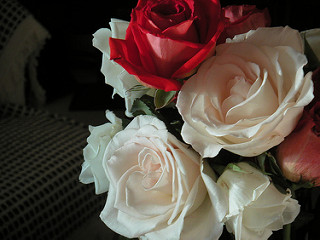

In [69]:
PIL.Image.open(str(roses[1]))

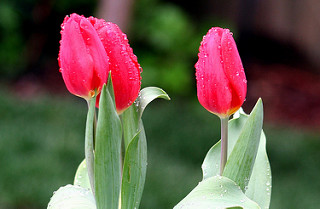

In [71]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [73]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [75]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [77]:
flowers_images_dict['roses'][:5]

[WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/dell/OneDrive/Pictures/Screenshots/flowers/datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [79]:

str(flowers_images_dict['roses'][0])

'C:\\Users\\dell\\OneDrive\\Pictures\\Screenshots\\flowers\\datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [81]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [85]:
img.shape   #rgb

(240, 179, 3)

In [87]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [89]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [91]:
X = np.array(X)
y = np.array(y)

In [93]:

from sklearn.model_selection import train_test_split   #default split is 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [95]:
len(X_train)

2752

In [97]:
len(X_test)

918

In [99]:
#Preprocessing: scale images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [101]:

# Build convolutional neural network and train it

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=18) 

Epoch 1/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 168ms/step - accuracy: 0.2814 - loss: 1.7999
Epoch 2/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.5635 - loss: 1.0674
Epoch 3/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.6430 - loss: 0.9063
Epoch 4/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.7268 - loss: 0.7169
Epoch 5/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.8214 - loss: 0.5072
Epoch 6/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.8943 - loss: 0.3123
Epoch 7/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - accuracy: 0.9552 - loss: 0.1620
Epoch 8/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - accuracy: 0.9699 - loss: 0.1137
Epoch 9/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.9758 - loss: 0.0887
Epoch 10/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.9904 - loss: 0.0381
Epoch 11/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.9898 - loss: 0.0413
Epoch 12/18
86/86 ━━━━━━━━━━━━━━━━━━━━ 15

In [103]:

model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6740 - loss: 2.3416


[2.3058300018310547, 0.6601307392120361]

In [105]:
## Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting


In [107]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step


array([[  4.2052245 ,  15.516336  ,  -3.0717812 , -16.314844  ,
          1.5307256 ],
       [ 12.766027  ,  -0.6817201 ,  -9.815517  ,  -5.434386  ,
          1.1332313 ],
       [ -3.131823  ,   4.117184  ,  17.274168  , -11.2542    ,
         -6.1360135 ],
       ...,
       [  5.5280833 ,  -4.5419426 , -12.049086  ,   5.887737  ,
          4.621825  ],
       [ -3.7385075 ,   3.5779335 ,   2.1491373 ,  -3.8239653 ,
         -3.6188903 ],
       [ -2.1933732 , -10.432466  ,   0.67200434,   8.685208  ,
          7.221339  ]], shape=(918, 5), dtype=float32)

In [109]:
score = tf.nn.softmax(predictions[0])

In [111]:
np.argmax(score)

np.int64(1)

In [113]:
y_test[0]

np.int64(1)

In [115]:
## Improve Test Accuracy Using Data Augmentation

In [121]:
img_height = 180 
img_width = 180 
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

C:\Users\dell\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


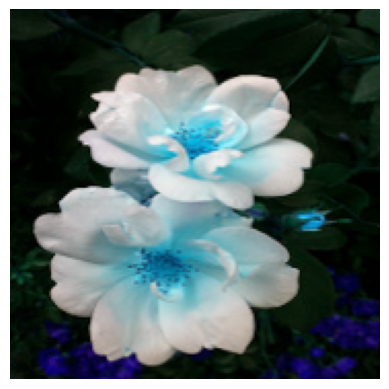

In [123]:

plt.axis('off')
plt.imshow(X[0])

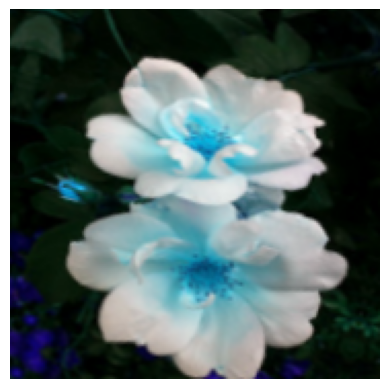

In [125]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [127]:
# Train the model using data augmentation and a drop out layer

In [129]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 279ms/step - accuracy: 0.3922 - loss: 1.4235
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.5988 - loss: 1.0501
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 296ms/step - accuracy: 0.6235 - loss: 0.9612
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.6514 - loss: 0.8801
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 293ms/step - accuracy: 0.6790 - loss: 0.8350
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 292ms/step - accuracy: 0.6986 - loss: 0.7598
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.7130 - loss: 0.7476
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 311ms/step - accuracy: 0.7484 - loss: 0.6844
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 364ms/step - accuracy: 0.7477 - loss: 0.6502
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - accuracy: 0.7685 - loss: 0.6289


In [131]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6813 - loss: 0.8668


[0.8943375945091248, 0.6895424723625183]

In [135]:
## You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 68.14%